# Evaluation notebook
This notebook is meant to be executed after 'main.py' and 'main_multiuser.py', since it uses the results stored by those programs for visualisation purposes.
The first cell contains the parameters to be tuned for a correct execution. Here's a quick explanation:
- datapath: string, containing the folder where results have been stored by 'main.py' and 'main_multiuser.py'. Note that results are saved as .txt files;
- subjects: list of integers, containing the different configurations of subjects on which models have been tested;
- model_names: list of strings, containing the names of models that have been deployed.

In [1]:
datapath = "./data/results/"
subjects = [1,2,3,4,23]
model_names = ["Convolutional", "Convolutional1DRecurrent", "Convolutional2DRecurrent", "ConvolutionalDeepRecurrent"]

Import useful packeges.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task A

In [3]:
task = "A"
results = np.zeros([3,len(subjects),len(model_names)])
print("Results matrix has shape", results.shape)
for model in enumerate(model_names):
    for s in enumerate(subjects):
        filename = task + "_" + model[1] + "_" + str(s[1]) + ".txt"
        print("Loading", filename)
        results[:,s[0], model[0]] = np.loadtxt(datapath + filename, comments="#", delimiter="\n", unpack=False)

Results matrix has shape (3, 5, 4)
Loading A_Convolutional_1.txt
Loading A_Convolutional_2.txt
Loading A_Convolutional_3.txt
Loading A_Convolutional_4.txt
Loading A_Convolutional_23.txt
Loading A_Convolutional1DRecurrent_1.txt
Loading A_Convolutional1DRecurrent_2.txt
Loading A_Convolutional1DRecurrent_3.txt
Loading A_Convolutional1DRecurrent_4.txt
Loading A_Convolutional1DRecurrent_23.txt
Loading A_Convolutional2DRecurrent_1.txt
Loading A_Convolutional2DRecurrent_2.txt
Loading A_Convolutional2DRecurrent_3.txt
Loading A_Convolutional2DRecurrent_4.txt
Loading A_Convolutional2DRecurrent_23.txt
Loading A_ConvolutionalDeepRecurrent_1.txt
Loading A_ConvolutionalDeepRecurrent_2.txt
Loading A_ConvolutionalDeepRecurrent_3.txt
Loading A_ConvolutionalDeepRecurrent_4.txt
Loading A_ConvolutionalDeepRecurrent_23.txt


## One-Shot classification results
These results consist of the classifications performed with the null class, which are stored on the top matrix.

In [4]:
res_A1 = pd.DataFrame(results[0,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_A1

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.9009,0.8943,0.9083,0.8996
S2,0.8277,0.7461,0.7478,0.7487
S3,0.8225,0.8090,0.8264,0.8156
S4,0.8689,0.8720,0.8718,0.8783
S2+S3,0.7805,0.7889,0.7892,0.7921


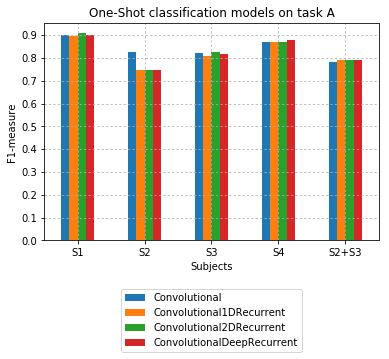

In [23]:
plt.figure()
res_A1.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("One-Shot classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_nullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Two-Step classification results
These results consist of the classifications performed without the null class, which are stored on the bottom matrix.

In [6]:
res_A2 = pd.DataFrame(results[2,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_A2

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.9445,0.9338,0.9389,0.9383
S2,0.7799,0.7790,0.7766,0.8398
S3,0.8998,0.8881,0.8971,0.8972
S4,0.8816,0.8895,0.8896,0.8882
S2+S3,0.8229,0.8377,0.8316,0.8344


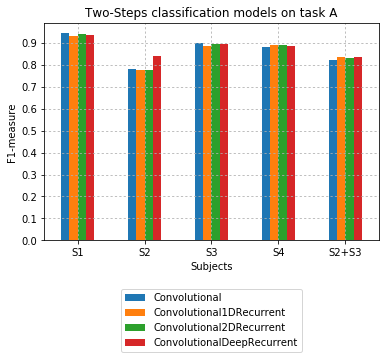

In [7]:
plt.figure()
res_A2.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Two-Steps classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_nonullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Comparison between classifications with and without null class

In [8]:
res_A_comp = pd.concat([res_A1, res_A2], axis=1, keys=["with null class", "without null class"])
res_A_comp

with null class                                                    \
        Convolutional Convolutional1DRecurrent Convolutional2DRecurrent   
S1             0.9009                   0.8943                   0.9083   
S2             0.8277                   0.7461                   0.7478   
S3             0.8225                   0.8090                   0.8264   
S4             0.8689                   0.8720                   0.8718   
S2+S3          0.7805                   0.7889                   0.7892   

                                 without null class                           \
      ConvolutionalDeepRecurrent      Convolutional Convolutional1DRecurrent   
S1                        0.8996             0.9445                   0.9338   
S2                        0.7487             0.7799                   0.7790   
S3                        0.8156             0.8998                   0.8881   
S4                        0.8783             0.8816                   0.8895   
S2+S3                     0.7921             0.8229                   0.8377   

                                                           
      Convolutional2DRecurrent ConvolutionalDeepRecurrent  
S1                      0.9389                     0.9383  
S2                      0.7766                     0.8398  
S3                      0.8971                     0.8972  
S4                      0.8896                     0.8882  
S2+S3                   0.8316                     0.8344

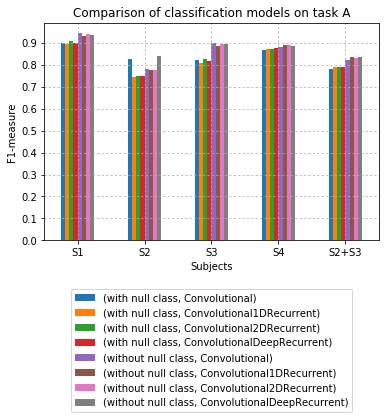

In [9]:
plt.figure()
res_A_comp.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Comparison of classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_comparison.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Results by model
Select one model to display its 3 results on each run. The available models are the following:
- 0: Convolutional
- 1: Convolutional1DRecurrent
- 2: COnvolutional2DRecurrent
- 3: ConvolutionalDeepRecurrend

In [10]:
select_model = 3
print("Displaying results for", model_names[select_model], "model.")

Displaying results for ConvolutionalDeepRecurrent model.


In [11]:
res_A3 = pd.DataFrame(results[:,:,select_model].T,
                      index=["S1", "S2", "S3", "S4", "S2+S3"],
                      columns=["One-Shot Classification", "Two-Step Detection", "Two-Step Classification"])
res_A3

,One-Shot Classification,Two-Step Detection,Two-Step Classification
S1,0.8996,0.9547,0.9383
S2,0.7487,0.9444,0.8398
S3,0.8156,0.9087,0.8972
S4,0.8783,0.9701,0.8882
S2+S3,0.7921,0.9208,0.8344


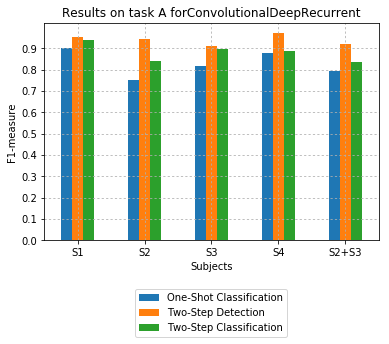

In [12]:
plt.figure()
res_A3.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Results on task A for"+model_names[select_model])
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_"+model_names[select_model]+".eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# Task B

In [13]:
task = "B"
results = np.zeros([3,len(subjects),len(model_names)])
print("Results matrix has shape", results.shape)
for model in enumerate(model_names):
    for s in enumerate(subjects):
        filename = task + "_" + model[1] + "_" + str(s[1]) + ".txt"
        print("Loading", filename)
        results[:,s[0], model[0]] = np.loadtxt(datapath + filename, comments="#", delimiter="\n", unpack=False)

Results matrix has shape (3, 5, 4)
Loading B_Convolutional_1.txt
Loading B_Convolutional_2.txt
Loading B_Convolutional_3.txt
Loading B_Convolutional_4.txt
Loading B_Convolutional_23.txt
Loading B_Convolutional1DRecurrent_1.txt
Loading B_Convolutional1DRecurrent_2.txt
Loading B_Convolutional1DRecurrent_3.txt
Loading B_Convolutional1DRecurrent_4.txt
Loading B_Convolutional1DRecurrent_23.txt
Loading B_Convolutional2DRecurrent_1.txt
Loading B_Convolutional2DRecurrent_2.txt
Loading B_Convolutional2DRecurrent_3.txt
Loading B_Convolutional2DRecurrent_4.txt
Loading B_Convolutional2DRecurrent_23.txt
Loading B_ConvolutionalDeepRecurrent_1.txt
Loading B_ConvolutionalDeepRecurrent_2.txt
Loading B_ConvolutionalDeepRecurrent_3.txt
Loading B_ConvolutionalDeepRecurrent_4.txt
Loading B_ConvolutionalDeepRecurrent_23.txt


## One-Shot classification results
These results consist of the classifications performed with the null class, which are stored on the top matrix.

In [14]:
res_B1 = pd.DataFrame(results[0,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_B1

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.8743,0.8900,0.8984,0.8707
S2,0.8001,0.8105,0.8103,0.8054
S3,0.8573,0.8758,0.8802,0.8597
S4,0.8458,0.8407,0.8497,0.8488
S2+S3,0.8178,0.8329,0.8406,0.8188


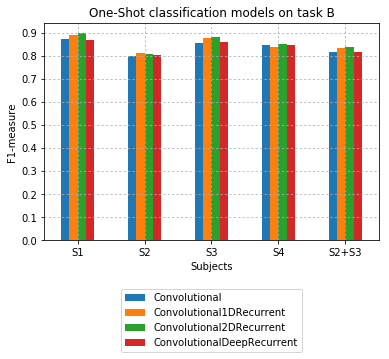

In [15]:
plt.figure()
res_B1.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("One-Shot classification models on task B")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_models_nullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Two-Step classification results
These results consist of the classifications performed without the null class, which are stored on the bottom matrix.

In [16]:
res_B2 = pd.DataFrame(results[2,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_B2

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.7811,0.7941,0.8099,0.7758
S2,0.3284,0.3490,0.4382,0.3449
S3,0.7354,0.7559,0.8022,0.7217
S4,0.6448,0.6564,0.6657,0.6633
S2+S3,0.5627,0.6042,0.6408,0.5582


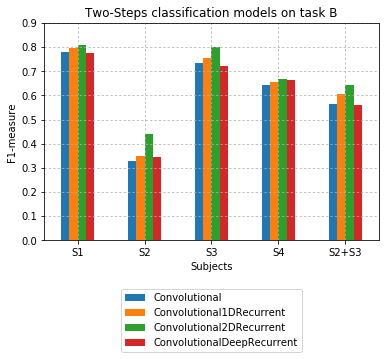

In [17]:
plt.figure()
res_B2.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Two-Steps classification models on task B")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_models_nonullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Comparison between classifications with and without null class

In [18]:
res_B_comp = pd.concat([res_B1, res_B2], axis=1, keys=["with null class", "without null class"])
res_B_comp

with null class                                                    \
        Convolutional Convolutional1DRecurrent Convolutional2DRecurrent   
S1             0.8743                   0.8900                   0.8984   
S2             0.8001                   0.8105                   0.8103   
S3             0.8573                   0.8758                   0.8802   
S4             0.8458                   0.8407                   0.8497   
S2+S3          0.8178                   0.8329                   0.8406   

                                 without null class                           \
      ConvolutionalDeepRecurrent      Convolutional Convolutional1DRecurrent   
S1                        0.8707             0.7811                   0.7941   
S2                        0.8054             0.3284                   0.3490   
S3                        0.8597             0.7354                   0.7559   
S4                        0.8488             0.6448                   0.6564   
S2+S3                     0.8188             0.5627                   0.6042   

                                                           
      Convolutional2DRecurrent ConvolutionalDeepRecurrent  
S1                      0.8099                     0.7758  
S2                      0.4382                     0.3449  
S3                      0.8022                     0.7217  
S4                      0.6657                     0.6633  
S2+S3                   0.6408                     0.5582

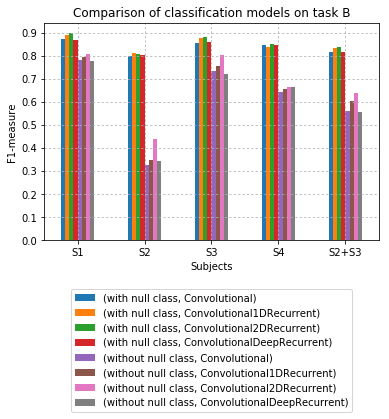

In [19]:
plt.figure()
res_B_comp.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Comparison of classification models on task B")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_models_comparison.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Results by model
Select one model to display its 3 results on each run. The available models are the following:
- 0: Convolutional
- 1: Convolutional1DRecurrent
- 2: COnvolutional2DRecurrent
- 3: ConvolutionalDeepRecurrend

In [20]:
select_model = 3
print("Displaying results for", model_names[select_model], "model.")

Displaying results for ConvolutionalDeepRecurrent model.


In [21]:
res_B3 = pd.DataFrame(results[:,:,select_model].T,
                      index=["S1", "S2", "S3", "S4", "S2+S3"],
                      columns=["One-Shot Classification", "Two-Step Detection", "Two-Step Classification"])
res_B3

,One-Shot Classification,Two-Step Detection,Two-Step Classification
S1,0.8707,0.9206,0.7758
S2,0.8054,0.8594,0.3449
S3,0.8597,0.8808,0.7217
S4,0.8488,0.8917,0.6633
S2+S3,0.8188,0.8686,0.5582


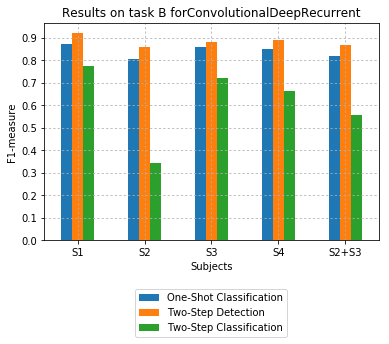

In [22]:
plt.figure()
res_B3.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Results on task B for"+model_names[select_model])
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_"+model_names[select_model]+".eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# End